In [ ]:
import pandas as pd
import pickle
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


df = pd.read_csv('df_copy.csv', index_col=0, parse_dates=True)
df['Year']      = df.index.year
df['Month']     = df.index.month
df['Day']       = df.index.day
df['DayOfWeek'] = df.index.dayofweek

X = df.drop(columns=['Close_shifted'])
n_test = int(len(X) * 0.2)
X_test = X.iloc[-n_test:]
y_test = df['Close_shifted'].iloc[-n_test:]


with open('rf_naive_features.pkl','rb') as f:
    feature_names = pickle.load(f)
with open('rf_naive_scaler.pkl','rb') as f:
    scaler = pickle.load(f)
with open('rf_naive_model.pkl','rb') as f:
    model = pickle.load(f)


X_test_s = scaler.transform(X_test)
X_test_s_df = pd.DataFrame(X_test_s, columns=X_test.columns, index=X_test.index)
X_sub = X_test_s_df[feature_names]

y_pred = model.predict(X_sub)


print("=== Part 1: Test set preview ===")
display(pd.concat([X_test.head(), y_test.head()], axis=1))


mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)

print("\n=== Part 2: Metrics ===")
print(f"Test MSE : {mse:.2f}")
print(f"Test MAE : {mae:.2f}")
print(f"Test R²  : {r2:.4f} ({r2*100:.2f}%)")

print("\n=== Part 2: Predictions preview ===")
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}, index=y_test.index)
display(results.head())


idx = 0
ix = results.index[idx]
print(f"\n=== Part 3: Single example at index {ix.date()} ===\n")
print("Input features:")
display(X_sub.iloc[idx:idx+1].T)
print(f"True Close:     {results['Actual'].iloc[idx]}")
print(f"Predicted Close:{results['Predicted'].iloc[idx]}")


=== Part 1: Test set preview ===


c:\Users\ASUS\Desktop\470_project\env\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


,Open,High,Low,Close,Adj Close,Volume,Open_brent,High_brent,Low_brent,Close_brent,...,BB_UPPER,BB_LOWER,RSI_14,MACD,MACD_SIGNAL,Year,Month,Day,DayOfWeek,Close_shifted
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-21,22677.43,23282.35,22511.83,22777.63,22777.63,3.244228e+10,86.360001,87.769997,85.580002,87.629997,...,23429.087985,14655.052015,91.737214,1372.354962,971.698823,2023,1,21,5,22720.42
2023-01-22,22777.99,23056.73,22387.90,22720.42,22720.42,2.474639e+10,86.360001,87.769997,85.580002,87.629997,...,23876.350150,14810.984850,90.813178,1436.361207,1064.631300,2023,1,22,6,22934.43
2023-01-23,22721.09,23126.49,22654.30,22934.43,22934.43,2.651870e+10,87.809998,89.099998,86.930000,88.190002,...,24277.434381,15035.357619,90.955603,1487.211784,1149.147397,2023,1,23,0,22636.47
2023-01-24,22929.63,23134.01,22549.74,22636.47,22636.47,2.640507e+10,88.029999,88.709999,85.809998,86.129997,...,24552.696261,15337.418739,86.792982,1486.334808,1216.584879,2023,1,24,1,23117.86
2023-01-25,22639.27,23722.10,22406.08,23117.86,23117.86,3.068537e+10,86.300003,87.010002,85.410004,86.120003,...,24830.799948,15687.427052,86.779449,1507.110912,1274.690086,2023,1,25,2,23032.78



=== Part 2: Metrics ===
Test MSE : 165295181.46
Test MAE : 6053.23
Test R²  : 0.7202 (72.02%)

=== Part 2: Predictions preview ===


,Actual,Predicted
Date,,
2023-01-21,22720.42,23386.0634
2023-01-22,22934.43,23271.6456
2023-01-23,22636.47,23541.3771
2023-01-24,23117.86,23101.2668
2023-01-25,23032.78,23704.2218



=== Part 3: Single example at index 2023-02-15 ===

Input features:


Date,2023-02-15
Open,0.577744
High,0.669789
Low,0.609616
Close,0.706880
Adj Close,0.706880
Volume,0.808871
Open_brent,1.232537
High_brent,1.184680
Low_brent,1.232576
Close_brent,1.227674


True Close:     23623.47
Predicted Close:23680.607100000005


X_test (first 5 rows):


,Open,High,Low,Close,Adj Close,Volume,Open_brent,High_brent,Low_brent,Close_brent,...,SMA_10,SMA_20,EMA_10,BB_MID,BB_STD,BB_UPPER,BB_LOWER,RSI_14,MACD,MACD_SIGNAL
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-21,22677.43,23282.35,22511.83,22777.63,22777.63,3.244228e+10,86.360001,87.769997,85.580002,87.629997,...,21019.716,19042.0700,20952.735216,19042.0700,2193.508992,23429.087985,14655.052015,91.737214,1372.354962,971.698823
2023-01-22,22777.99,23056.73,22387.90,22720.42,22720.42,2.474639e+10,86.360001,87.769997,85.580002,87.629997,...,21404.799,19343.6675,21274.132450,19343.6675,2266.341325,23876.350150,14810.984850,90.813178,1436.361207,1064.631300
2023-01-23,22721.09,23126.49,22654.30,22934.43,22934.43,2.651870e+10,87.809998,89.099998,86.930000,88.190002,...,21707.285,19656.3960,21576.004731,19656.3960,2310.519190,24277.434381,15035.357619,90.955603,1487.211784,1149.147397
2023-01-24,22929.63,23134.01,22549.74,22636.47,22636.47,2.640507e+10,88.029999,88.709999,85.809998,86.129997,...,21873.302,19945.0575,21768.816598,19945.0575,2303.819381,24552.696261,15337.418739,86.792982,1486.334808,1216.584879
2023-01-25,22639.27,23722.10,22406.08,23117.86,23117.86,3.068537e+10,86.300003,87.010002,85.410004,86.120003,...,22097.008,20259.1135,22014.097217,20259.1135,2285.843224,24830.799948,15687.427052,86.779449,1507.110912,1274.690086



y_test (first 5 rows):


Date
2023-01-21    22720.42
2023-01-22    22934.43
2023-01-23    22636.47
2023-01-24    23117.86
2023-01-25    23032.78
Name: Close_shifted, dtype: float64

Test MSE: 324679.83
Test MAE: 376.10
Test R² : 0.9995

First 5 predictions:


,Actual,Predicted
Date,,
2023-01-21,22720.42,22854.4905
2023-01-22,22934.43,22915.4418
2023-01-23,22636.47,22788.2866
2023-01-24,23117.86,23100.6234
2023-01-25,23032.78,23056.2308


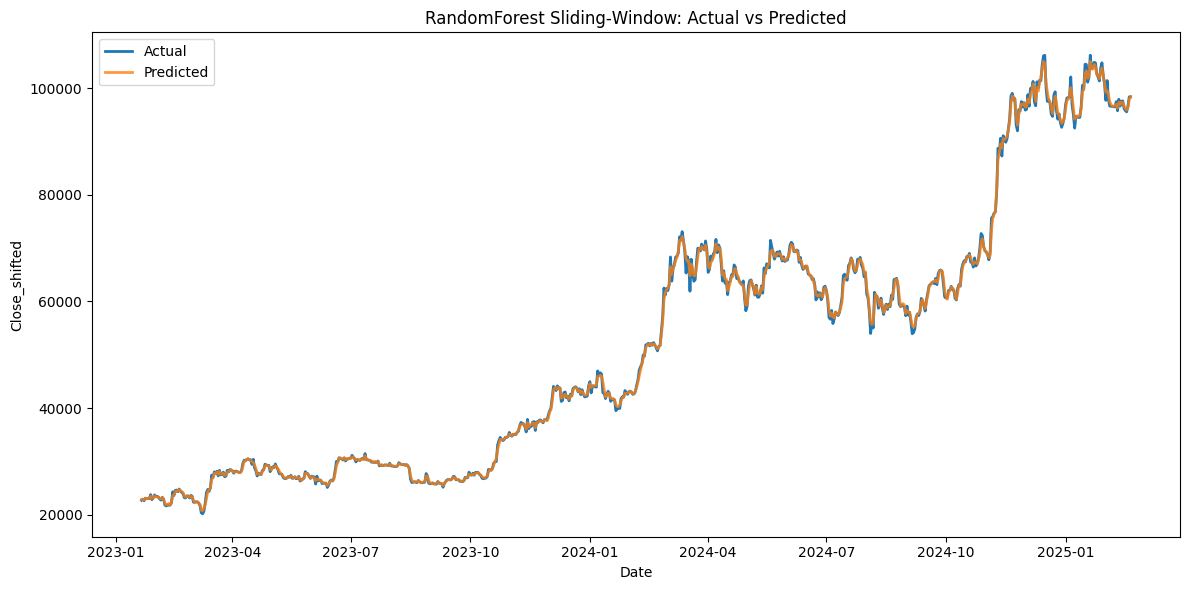

▶ Example date: 2023-01-21

Input features for that day:


Date,2023-01-21
Open,2.267743e+04
High,2.328235e+04
Low,2.251183e+04
Close,2.277763e+04
Adj Close,2.277763e+04
Volume,3.244228e+10
Open_brent,8.636000e+01
High_brent,8.777000e+01
Low_brent,8.558000e+01
Close_brent,8.763000e+01



True Close_shifted:      22720.42
Predicted Close_shifted: 22854.490499999974


In [ ]:
import pandas as pd


df = pd.read_csv('df_copy.csv', index_col=0, parse_dates=True)
df = df.dropna()


X       = df.drop(columns=['Close_shifted'])
y       = df['Close_shifted']
n_test  = int(len(X) * 0.2)
X_test  = X.iloc[-n_test:]
y_test  = y.iloc[-n_test:]


print("X_test (first 5 rows):")
display(X_test.head())

print("\ny_test (first 5 rows):")
display(y_test.head())


import pickle
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt


with open('rf_sliding_pipeline.pkl', 'rb') as f:
    rf_pipe = pickle.load(f)


y_pred = rf_pipe.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)
print(f"Test MSE: {mse:.2f}")
print(f"Test MAE: {mae:.2f}")
print(f"Test R² : {r2:.4f}\n")


results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}, index=y_test.index)
print("First 5 predictions:")
display(results.head())


plt.figure(figsize=(12,6))
plt.plot(results.index, results['Actual'],    label='Actual',   linewidth=2)
plt.plot(results.index, results['Predicted'], label='Predicted', linewidth=2, alpha=0.8)
plt.title('RandomForest Sliding‑Window: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Close_shifted')
plt.legend()
plt.tight_layout()
plt.show()




idx = 0
date_idx = X_test.index[idx]

print(f"▶ Example date: {date_idx.date()}\n")
print("Input features for that day:")
display(X_test.iloc[idx:idx+1].T)

true_val = y_test.iloc[idx]
pred_val = y_pred[idx]
print(f"\nTrue Close_shifted:      {true_val}")
print(f"Predicted Close_shifted: {pred_val}")



X_test (first 5 rows):


,Open,High,Low,Close,Adj Close,Volume,Open_brent,High_brent,Low_brent,Close_brent,...,BB_STD,BB_UPPER,BB_LOWER,RSI_14,MACD,MACD_SIGNAL,Year,Month,Day,DayOfWeek
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-21,22677.43,23282.35,22511.83,22777.63,22777.63,3.244228e+10,86.360001,87.769997,85.580002,87.629997,...,2193.508992,23429.087985,14655.052015,91.737214,1372.354962,971.698823,2023,1,21,5
2023-01-22,22777.99,23056.73,22387.90,22720.42,22720.42,2.474639e+10,86.360001,87.769997,85.580002,87.629997,...,2266.341325,23876.350150,14810.984850,90.813178,1436.361207,1064.631300,2023,1,22,6
2023-01-23,22721.09,23126.49,22654.30,22934.43,22934.43,2.651870e+10,87.809998,89.099998,86.930000,88.190002,...,2310.519190,24277.434381,15035.357619,90.955603,1487.211784,1149.147397,2023,1,23,0
2023-01-24,22929.63,23134.01,22549.74,22636.47,22636.47,2.640507e+10,88.029999,88.709999,85.809998,86.129997,...,2303.819381,24552.696261,15337.418739,86.792982,1486.334808,1216.584879,2023,1,24,1
2023-01-25,22639.27,23722.10,22406.08,23117.86,23117.86,3.068537e+10,86.300003,87.010002,85.410004,86.120003,...,2285.843224,24830.799948,15687.427052,86.779449,1507.110912,1274.690086,2023,1,25,2



y_test (first 5 rows):


Date
2023-01-21    22720.42
2023-01-22    22934.43
2023-01-23    22636.47
2023-01-24    23117.86
2023-01-25    23032.78
Name: Close_shifted, dtype: float64

Test MSE : 2162600.31
Test MAE : 958.79
Test R²  : 0.9963 (99.63%)

First 5 predictions:


,Actual,Predicted
Date,,
2023-01-21,22720.42,22936.497040
2023-01-22,22934.43,23090.754671
2023-01-23,22636.47,23232.481322
2023-01-24,23117.86,23021.923833
2023-01-25,23032.78,23373.647794


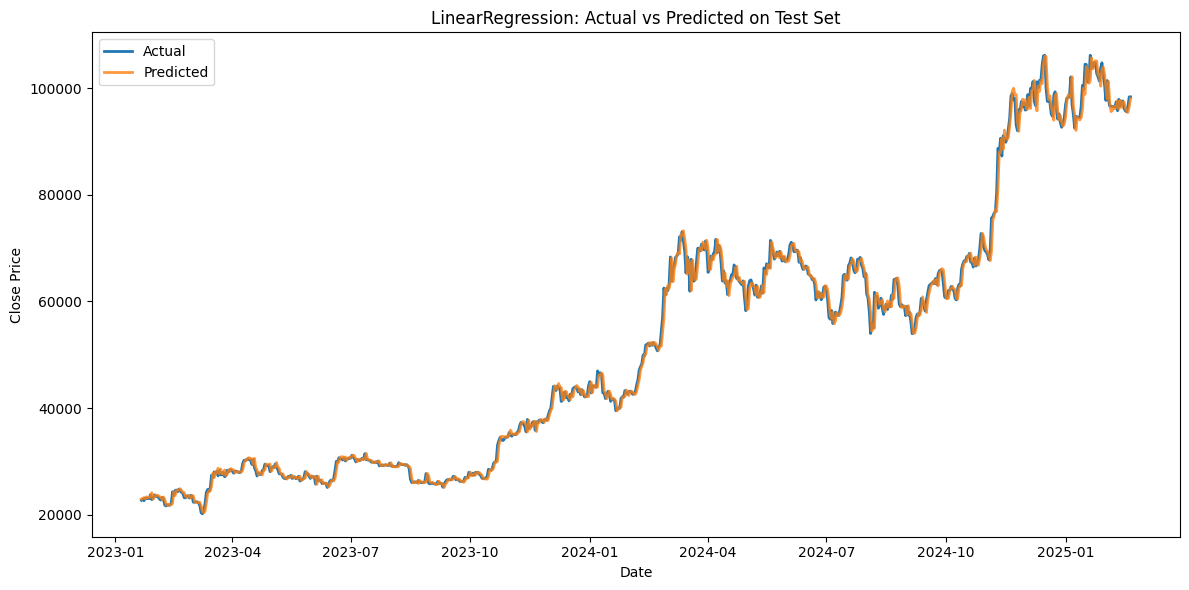

▶ Example date: 2023-01-21

Input features:


Date,2023-01-21
Open,2.267743e+04
High,2.328235e+04
Low,2.251183e+04
Close,2.277763e+04
Adj Close,2.277763e+04
Volume,3.244228e+10
Open_brent,8.636000e+01
High_brent,8.777000e+01
Low_brent,8.558000e+01
Close_brent,8.763000e+01



True Close Price:      22720.42
Predicted Close Price: 22936.497039650683


In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split

df_copy = pd.read_csv("df_copy.csv", index_col=0, parse_dates=True)

df = df_copy.copy()
df['Year']      = df.index.year
df['Month']     = df.index.month
df['Day']       = df.index.day
df['DayOfWeek'] = df.index.dayofweek


X = df.drop(columns=['Close_shifted'])
y = df['Close_shifted']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

print("X_test (first 5 rows):")
display(X_test.head())

print("\ny_test (first 5 rows):")
display(y_test.head())
import pickle
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt


with open('linear_regression_refit.pkl',    'rb') as f:
    lr_model      = pickle.load(f)
with open('linear_regression_features.pkl', 'rb') as f:
    feature_names = pickle.load(f)


X_test_sub = X_test[feature_names]
y_pred     = lr_model.predict(X_test_sub)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)
print(f"Test MSE : {mse:.2f}")
print(f"Test MAE : {mae:.2f}")
print(f"Test R²  : {r2:.4f} ({r2*100:.2f}%)\n")


results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}, index=y_test.index)
print("First 5 predictions:")
display(results.head())


plt.figure(figsize=(12,6))
plt.plot(results.index, results['Actual'],    label='Actual',   linewidth=2)
plt.plot(results.index, results['Predicted'], label='Predicted', linewidth=2, alpha=0.8)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('LinearRegression: Actual vs Predicted on Test Set')
plt.legend()
plt.tight_layout()
plt.show()




idx = 0
date_idx = X_test_sub.index[idx]

print(f"▶ Example date: {date_idx.date()}\n")


print("Input features:")
display(X_test_sub.iloc[idx:idx+1].T)

true_val = y_test.iloc[idx]
pred_val = y_pred[idx]
print(f"\nTrue Close Price:      {true_val}")
print(f"Predicted Close Price: {pred_val}")




Loaded XGB config: {'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.1, 'random_state': 42}
Test MSE: 183021191.34
Test MAE: 6451.92
Test R² : 0.6900 (69.00%)


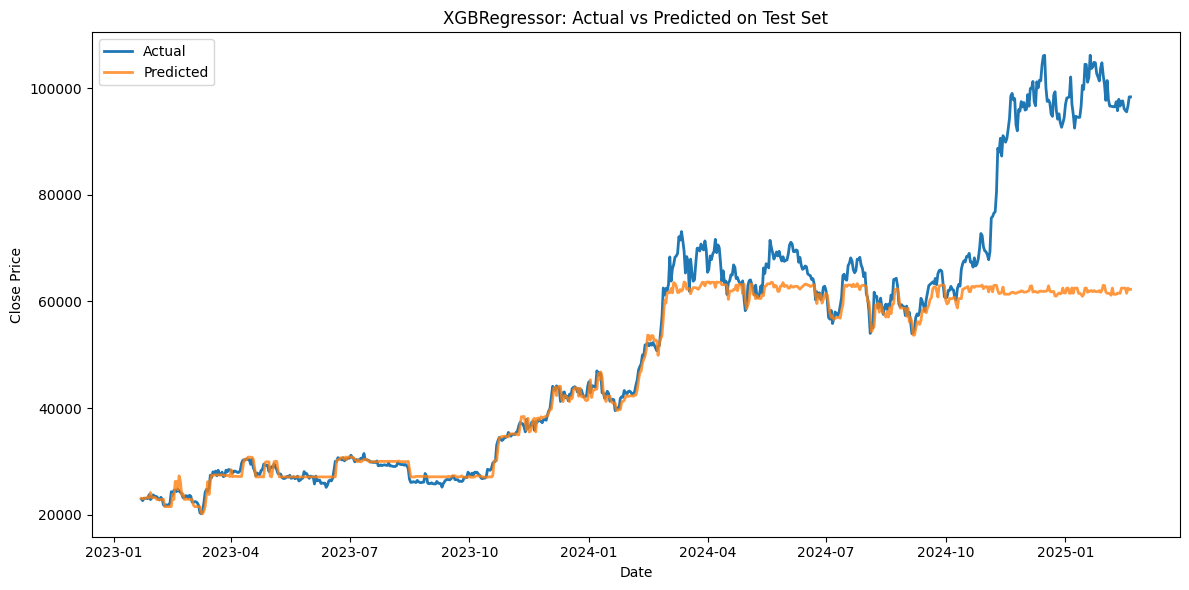

In [22]:
import pandas as pd, pickle, matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

df = df_copy.copy()
df['Year'], df['Month'], df['Day'], df['DayOfWeek'] = df.index.year, df.index.month, df.index.day, df.index.dayofweek
for lag in (1,2,3): df[f'Close_lag{lag}'] = df['Close'].shift(lag)
df.dropna(inplace=True)
X, y = df.drop(columns=['Close_shifted']), df['Close_shifted']
n_test = int(len(X)*0.2)
X_test, y_test = X.iloc[-n_test:], y.iloc[-n_test:]
feature_names = pickle.load(open('xgb_features.pkl','rb'))
model, config = pickle.load(open('xgb_best_model.pkl','rb')), pickle.load(open('xgb_config.pkl','rb'))
print("Loaded XGB config:", config)
X_sub = X_test[feature_names]
y_pred = model.predict(X_sub)
print(f"Test MSE: {mean_squared_error(y_test,y_pred):.2f}")
print(f"Test MAE: {mean_absolute_error(y_test,y_pred):.2f}")
print(f"Test R² : {r2_score(y_test,y_pred):.4f} ({r2_score(y_test,y_pred)*100:.2f}%)")
plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test,    label='Actual',   linewidth=2)
plt.plot(y_test.index, y_pred,    label='Predicted', linewidth=2, alpha=0.8)
plt.xlabel('Date'); plt.ylabel('Close Price')
plt.title('XGBRegressor: Actual vs Predicted on Test Set')
plt.legend(); plt.tight_layout(); plt.show()


Part 1: First 5 true Close_shifted values:
2023-01-21 22720.42
2023-01-22 22934.43
2023-01-23 22636.47
2023-01-24 23117.86
2023-01-25 23032.78
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step

Part 2: Metrics → MSE: 23604791.61, MAE: 3442.70, R²: 0.9600 (96.00%)


,Actual,Predicted
Date,,
2023-01-21,22720.42,21961.738281
2023-01-22,22934.43,21989.003906
2023-01-23,22636.47,22187.406250
2023-01-24,23117.86,21936.494141
2023-01-25,23032.78,22376.085938


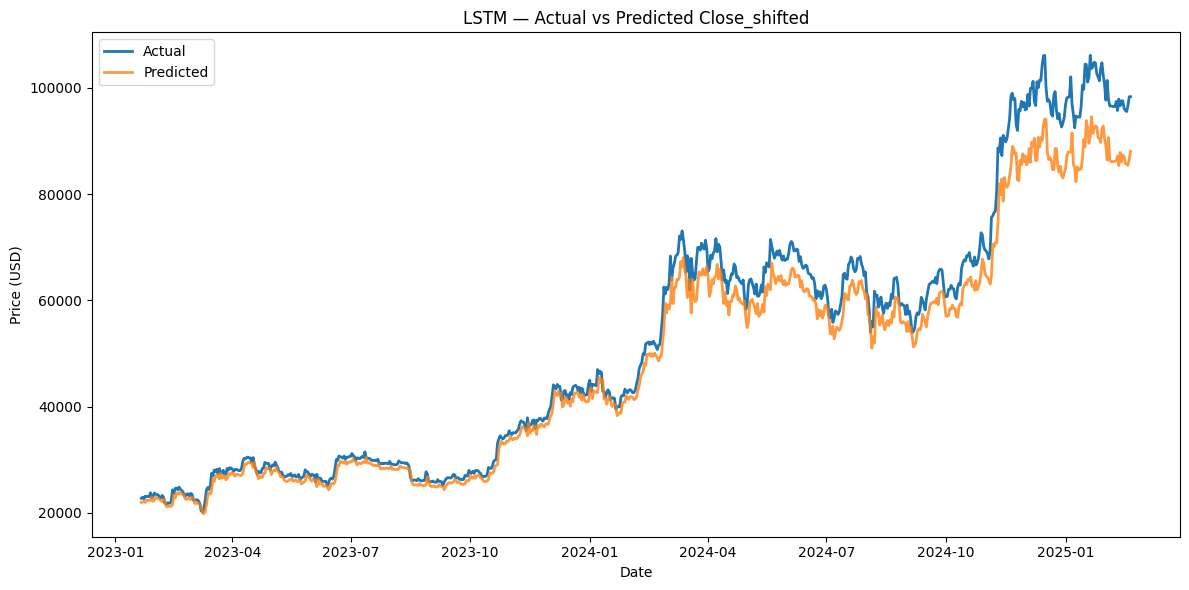


Part 3: Example date 2023-01-21
True: 22720.42    Pred: 21961.73828125
Last 5 timesteps of input window: [0.19801625 0.1935551  0.19731104 0.21231328 0.21326715]


In [ ]:
import math, pandas as pd, numpy as np
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt


df = pd.read_csv('df_copy.csv', parse_dates=['Date'], index_col='Date').sort_index().dropna()
data = df[['Close_shifted']].values
train_len = math.ceil(len(data)*0.8)
scaler = MinMaxScaler((0,1)); scaled = scaler.fit_transform(data)
td = scaled[train_len-60:,:]
X_test = np.array([td[i-60:i,0] for i in range(60,len(td))]).reshape(-1,60,1)
y_test = data[train_len:,:].flatten()


print("Part 1: First 5 true Close_shifted values:")
for date, val in zip(df.index[train_len:train_len+5], y_test[:5]):
    print(date.date(), val)


model = load_model('lstm_close_shifted_model.h5', compile=False)
pred_scaled = model.predict(X_test)
pred = scaler.inverse_transform(pred_scaled).flatten()


mse, mae, r2 = mean_squared_error(y_test, pred), mean_absolute_error(y_test, pred), r2_score(y_test, pred)
print(f"\nPart 2: Metrics → MSE: {mse:.2f}, MAE: {mae:.2f}, R²: {r2:.4f} ({r2*100:.2f}%)")
results = pd.DataFrame({'Actual': y_test, 'Predicted': pred}, index=df.index[train_len:train_len+len(pred)])
display(results.head())
plt.figure(figsize=(12,6))
plt.plot(results.index, results['Actual'],    label='Actual',   linewidth=2)
plt.plot(results.index, results['Predicted'], label='Predicted', linewidth=2, alpha=0.8)
plt.title('LSTM — Actual vs Predicted Close_shifted'); plt.xlabel('Date'); plt.ylabel('Price (USD)')
plt.legend(); plt.tight_layout(); plt.show()

idx = 0
d = results.index[idx]
print(f"\nPart 3: Example date {d.date()}")
print(f"True: {results['Actual'].iloc[idx]}    Pred: {results['Predicted'].iloc[idx]}")
print("Last 5 timesteps of input window:", X_test[idx, -5:, 0])


Part 1: first 5 true returns
2023-01-27 -0.0020642383701355844
2023-01-28 0.03228158111491908
2023-01-29 -0.03930376027831417
2023-01-30 0.013097117618368292
2023-01-31 0.025259645071065373
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step

Part 2: MSE=2283809.16, MAE=979.74, R²=0.9961


,Actual,Predicted
Date,,
2023-01-27,23031.09,23124.856603
2023-01-28,23774.57,23077.041766
2023-01-29,22840.14,23821.727415
2023-01-30,23139.28,22884.814995
2023-01-31,23723.77,23184.043593


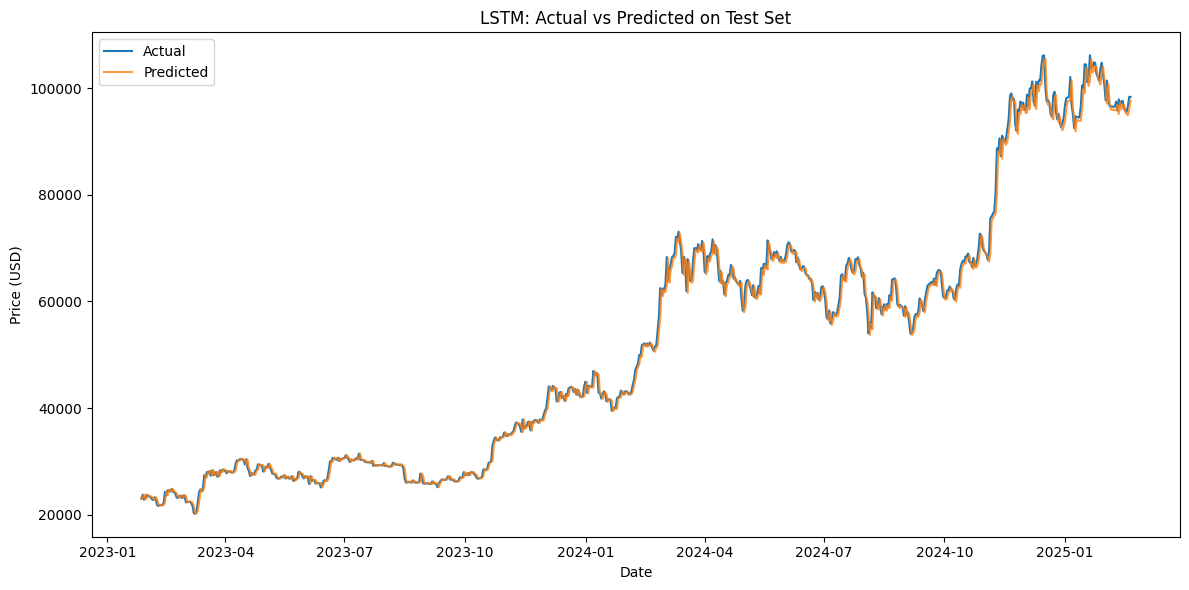


Part 3: example at 2023-01-27
Actual: 23031.09 Predicted: 23124.856602551936
Last 5 closes of input window: [22720.42 22934.43 22636.47 23117.86 23032.78]


In [ ]:
import pandas as pd, numpy as np, joblib
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt


df = pd.read_csv('df_copy.csv', parse_dates=['Date'], index_col='Date')
df = df[['Open','Close','Low','High','Volume','Close_shifted']].dropna()
df['Return'] = df['Close_shifted']/df['Close'] - 1


X = df[['Open','Close','Low','High','Volume']].values
y = df['Return'].values.reshape(-1,1)
scX, scY = joblib.load('scaler_X.pkl'), joblib.load('scaler_y.pkl')
Xs, ys = scX.transform(X), scY.transform(y)


def make_seq(X,y,w): 
    return np.array([X[i-w:i] for i in range(w,len(X))]), np.array([y[i] for i in range(w,len(y))])
w = 30
X_seq, Y_seq = make_seq(Xs, ys, w)
split = int(len(X_seq)*0.8)
X_test, Y_test = X_seq[split:], Y_seq[split:]
start = w + split


dates_p1 = df.index[start:start+5]
y_true_p1 = scY.inverse_transform(Y_test).flatten()[:5]
print("Part 1: first 5 true returns")
for d, val in zip(dates_p1, y_true_p1):
    print(d.date(), val)


model = load_model('best_lstm.h5', compile=False)
y_pred = scY.inverse_transform(model.predict(X_test)).flatten()


close_vals  = df['Close'].values[start:start+len(y_pred)]
price_true  = df['Close_shifted'].values[start:start+len(y_pred)]
price_pred  = close_vals * (1 + y_pred)
dates_all   = df.index[start:start+len(y_pred)]


mse = mean_squared_error(price_true, price_pred)
mae = mean_absolute_error(price_true, price_pred)
r2  = r2_score(price_true, price_pred)
print(f"\nPart 2: MSE={mse:.2f}, MAE={mae:.2f}, R²={r2:.4f}")
res = pd.DataFrame({'Actual': price_true, 'Predicted': price_pred}, index=dates_all)
display(res.head())
plt.figure(figsize=(12,6))
plt.plot(dates_all, price_true,  label='Actual')
plt.plot(dates_all, price_pred,  label='Predicted', alpha=0.8)
plt.title('LSTM: Actual vs Predicted on Test Set')
plt.xlabel('Date'); plt.ylabel('Price (USD)')
plt.legend(); plt.tight_layout(); plt.show()


i = 0
print(f"\nPart 3: example at {dates_all[i].date()}")
print("Actual:", price_true[i], "Predicted:", price_pred[i])
print("Last 5 closes of input window:", df['Close'].iloc[start+i-w:start+i].tail(5).values)
